I want to make a lot of plots of just diverent observation paramiters for the data.

In [1]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, sigma_sb, c
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run Binary_Data_Clean2.py
Tables = Binary_Data_Clean2('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.too_fast(AllVis,SNR_cut = True)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO)
AAS_RV = Tables.rv_table_add(AAS_RG_ISO, AllVis)
AllAvg_LMC_5 = Tables.mc_cut(AAS_RV, 'L')
AllAvg_SMC_5 = Tables.mc_cut(AAS_RV, 'S')

In [4]:
mean_vis_LMC = np.mean(AllAvg_LMC_5['NVISITS'])
mean_vis_SMC = np.mean(AllAvg_SMC_5['NVISITS'])
print('mean NVISITS for LMC Sample', mean_vis_LMC, '\n Mean NVISITS for SMC sample', mean_vis_SMC)
print('Number of stars in the LMC {}, SMC {}.'.format(len(AllAvg_LMC_5),len(AllAvg_SMC_5)))

mean NVISITS for LMC Sample 7.101949025487256 
 Mean NVISITS for SMC sample 6.034013605442177
Number of stars in the LMC 1334, SMC 441.


Made a cut to SNR, got rid of any observations with and SNR < 5. This will cause the number of data points to be different from 'NVISITS' in the allMC.avg. table because that kept low SNR measuments in it's calculations. 

In [64]:
AllVis_LMC = Tables.mc_cut(AllVis, 'L')
AllVis_SMC = Tables.mc_cut(AllVis, 'S')

In [67]:
AllVis_LMC

VISIT_ID,APRED_VERSION,APOGEE_ID,TARGET_ID,FILE,FIBERID,PLATE,MJD,TELESCOPE,SURVEY,FIELD,PROGRAMNAME,LOCATION_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,RA_TARG,DEC_TARG,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SNR,STARFLAG,STARFLAGS,DATEOBS,JD,BC,VTYPE,VREL,VRELERR,VHELIO,VLSR,VGSR,CHISQ,RV_TEFF,RV_FEH,RV_LOGG,RV_ALPHA,RV_CARB,SYNTHFILE,ESTVTYPE,ESTVREL,ESTVRELERR,ESTVHELIO,SYNTHVREL,SYNTHVRELERR,SYNTHVHELIO,OBSVREL,OBSVRELERR,OBSVHELIO,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,COMMISS,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC
str56,str2,str18,str36,str45,int16,str13,int32,str6,str14,str16,str18,int16,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int32,int32,int32,str192,float32,int32,str74,str23,float64,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str23,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int16,int16,float32,float32,float32,float32,str23,str14,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str17,float32,float32,int16,int16,float32,float32,str20
apogee.lco25m.s.t9.10103.58091.266,t9,2M03581138-7157028,LMC1.2M03581138-7157028,asVisit-t9-10103-58091-266.fits,266,10103,58091,lco25m,apogee2s,LMC1,magclouds,5504,59.547428,-71.950798,286.1864108504825,-38.51358796724218,14.277,0.033,13.744,0.035,13.648,0.055,0.0,0.0,0,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",9.19054,0,,2017-12-04T03:13:15.482,2458091.65739,-5.667652,0,45.78238,0.30810338,40.114727,33.8861,-131.4315,1.3652767,4750.0,-0.5,3.0,0.0,0.0,apg_rvsynthgrid.fits,2,46.579643,0.3391033,40.91199,45.661076,0.22032914,39.993423,45.723503,0.061198413,40.05585,-2139094912,0,0,0,1,-9999.99,9999.99,-9999.99,9999.99,2M03581138-7157028,2MASS,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,13.706,0.026,-9999.99,-9999.99,0.026936304,SFD,-0.011015902,0.08919306,-1,1,6.0,4.9,HSOY
apogee.lco25m.s.t9.10103.58094.146,t9,2M03581138-7157028,LMC1.2M03581138-7157028,asVisit-t9-10103-58094-146.fits,146,10103,58094,lco25m,apogee2s,LMC1,magclouds,5504,59.547428,-71.950798,286.1864108504825,-38.51358796724218,14.277,0.033,13.744,0.035,13.648,0.055,0.0,0.0,0,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",5.77019,0,,2017-12-07T03:57:11.585,2458094.67051,-5.5507827,0,45.391586,0.5858349,39.840805,33.61218,-131.70541,1.6830195,4750.0,-0.5,3.0,0.0,0.0,apg_rvsynthgrid.fits,1,45.86633,0.50348127,40.315548,44.965626,0.536619,39.414845,45.296658,0.110887945,39.745876,-2139094912,0,0,0,1,-9999.99,9999.99,-9999.99,9999.99,2M03581138-7157028,2MASS,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,13.706,0.026,-9999.99,-9999.99,0.026936304,SFD,-0.011015902,0.08919306,-1,1,6.0,4.9,HSOY
apogee.lco25m.s.t9.10103.58091.249,t9,2M03583726-7209278,LMC1.2M03583726-7209278,asVisit-t9-10103-58091-249.fits,249,10103,58091,lco25m,apogee2s,LMC1,magclouds,5504,59.655284,-72.15773,286.3812233356555,-38.36991110041894,14.276,0.029,13.742,0.038,13.626,0.039,0.0,0.0,0,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",7.91843,0,,2017-12-04T03:13:15.482,2458091.65739,-5.630183,0,99.50445,0.29691413,93.87427,87.68572,-77.79683,1.2858139,4750.0,-0.5,3.0,0.0,0.0,apg_rvsynthgrid.fits,2,99.63695,0.38681716,94.00677,99.50445,0.29691413,93.87427,99.645,0.056478348,94.01482,-2139094912,0,0,0,1,-9999.99,9999.99,-9999.99,9999.99,2M03583726-7209278,2MASS,-9999.99,-9999.99,-9999.99,-9999.99,-999

Text(0.5,1,'Normaled Histogram')

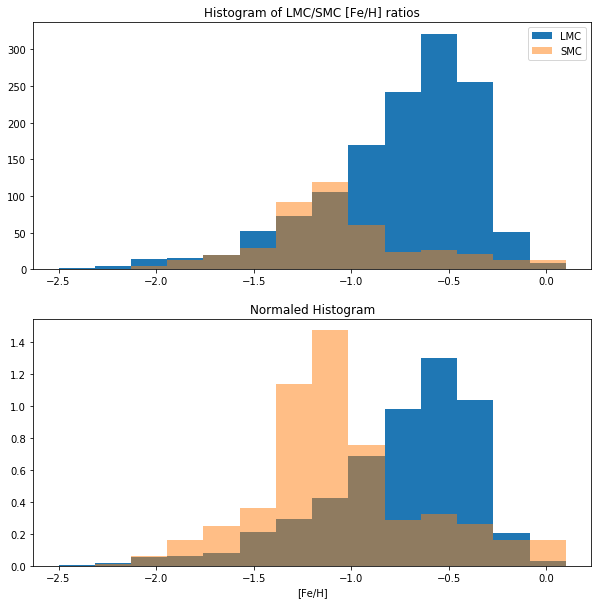

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
ax1.hist(AllAvg_LMC_5['FE_H'], color = 'C0', bins = np.linspace(-2.5,.1,15), label = 'LMC')
ax1.hist(AllAvg_SMC_5['FE_H'], color = 'C1', alpha = 0.5,bins = np.linspace(-2.5,.1,15),label = 'SMC')

ax2.hist(AllAvg_LMC_5['FE_H'], color = 'C0', bins = np.linspace(-2.5,.1,15), normed=True)
ax2.hist(AllAvg_SMC_5['FE_H'], color = 'C1', alpha = 0.5,bins = np.linspace(-2.5,.1,15), normed=True)

fig.tight_layout
ax1.set_title('Histogram of LMC/SMC [Fe/H] ratios')
ax1.legend()
ax2.set_xlabel('[Fe/H]')
ax2.set_title('Normaled Histogram')

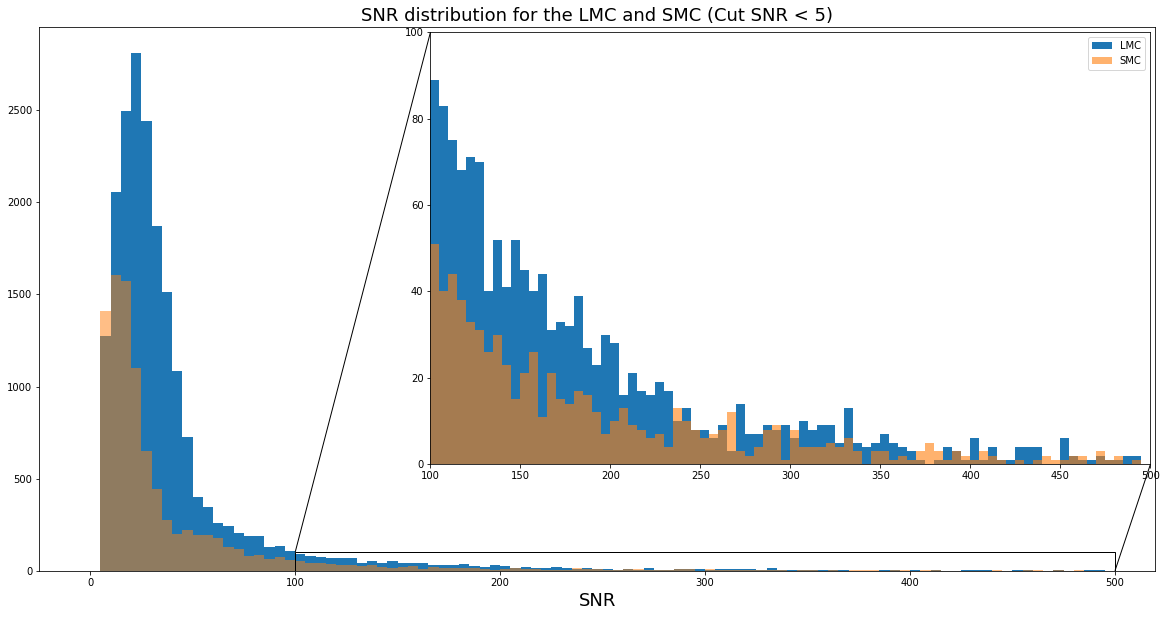

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5),label='LMC')
ax.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.5, label = 'SMC')
axins = inset_axes(ax, width = 10, height = 6, loc =1,) 
axins.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5),label='LMC',)
axins.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.6, label = 'SMC')
x1, x2, y1, y2 = 100, 500, 0, 100 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec = '0')

ax.set_title('SNR distribution for the LMC and SMC (Cut SNR < 5)', size = 18)
ax.set_xlabel('SNR', size = 18)
plt.legend()
plt.show()

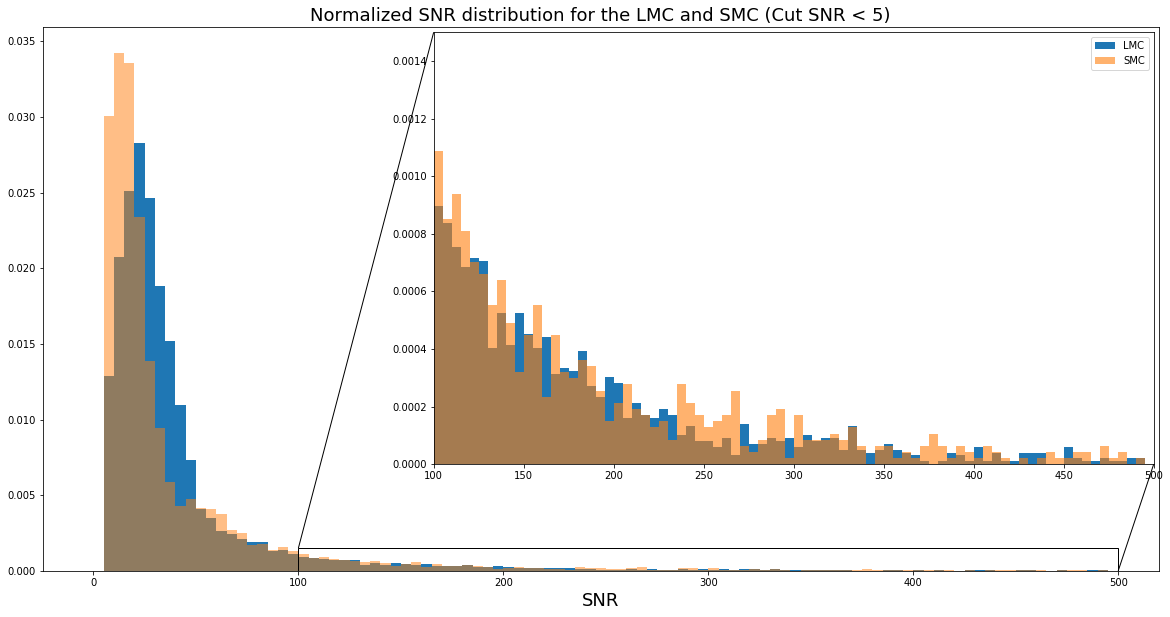

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5), density= True,label='LMC')
ax.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.5,density=True, label = 'SMC')
axins = inset_axes(ax, width = 10, height = 6, loc =1,) 
axins.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5), density= True,label='LMC',)
axins.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.6,density=True, label = 'SMC')
x1, x2, y1, y2 = 100, 500, 0, 0.0015 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")

ax.set_title('Normalized SNR distribution for the LMC and SMC (Cut SNR < 5)', size = 18)
ax.set_xlabel('SNR', size = 18)

plt.legend()
plt.show()

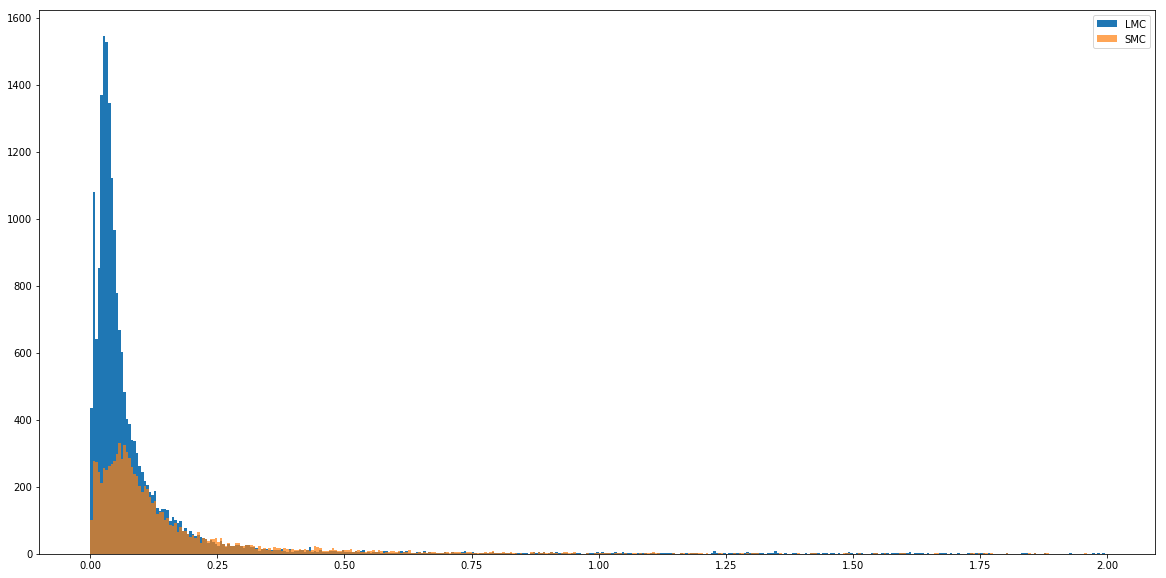

133
110


In [ ]:
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['VRELERR'],bins = np.arange(0,2,.005),label='LMC')
ax.hist(AllVis_SMC['VRELERR'],bins = np.arange(0,2,.005),alpha = 0.7, label='SMC')
plt.legend()
plt.show()
print(len(AllVis_LMC[AllVis_LMC['VRELERR'] > 2]))
print(len(AllVis_SMC[AllVis_SMC['VRELERR'] > 2]))

fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['VRELERR'],bins = np.arange(0,2,.005),density=True,label='LMC')
ax.hist(AllVis_SMC['VRELERR'],bins = np.arange(0,2,.005),alpha = 0.7, density=True, label='SMC')
plt.legend()
plt.show()

In [13]:
my_nvisits_lmc = []
my_nvisits_smc = []
for n in AllAvg_LMC_5['RADIALV']:
    my_nvisits_lmc.append(len(n))
for n in AllAvg_SMC_5['RADIALV']:
    my_nvisits_smc.append(len(n))

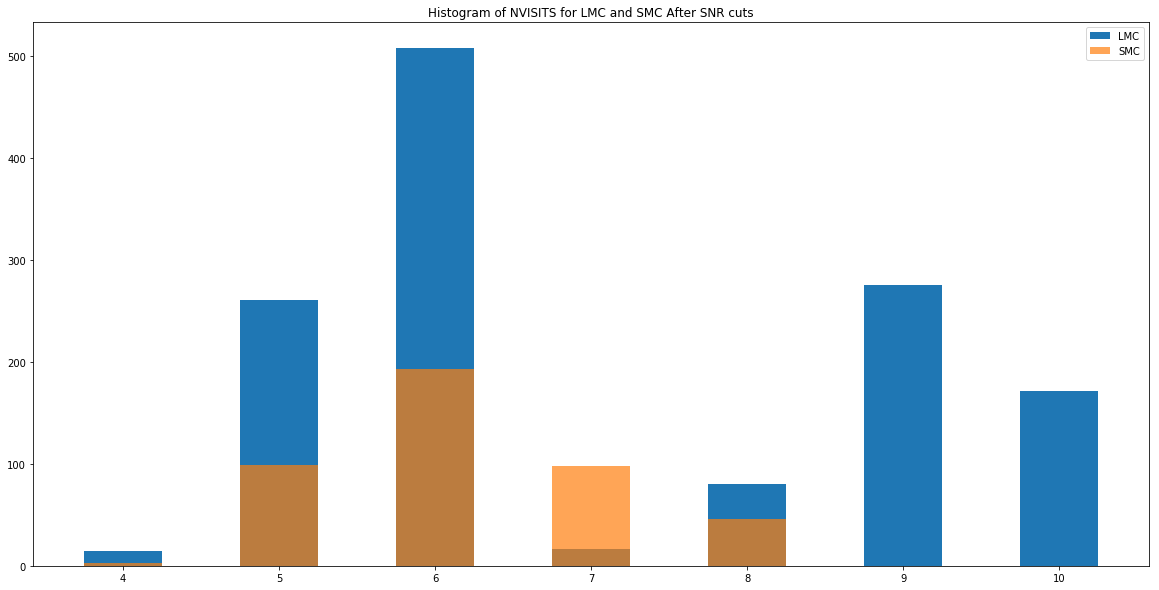

In [66]:
plt.figure(figsize = (20,10))
plt.title('Histogram of NVISITS for LMC and SMC After SNR cuts')
plt.hist(my_nvisits_lmc, bins = range(4,12), rwidth=0.5,
         align = 'left', label = 'LMC')
plt.hist(my_nvisits_smc, bins = range(4,12), rwidth=0.5,
         align = 'left', alpha = 0.7, label = 'SMC')
plt.legend()

In [186]:
AllAvg_LMC_5_SNR[binary_bool_LMC_5]['RADIAL_DATE']

[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 22.91019 61.83618 82.76264 86.76402]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]
[ 0. 2.97477 25.88496 64.81095 85.73741 89.73879]


In [16]:
%run Binary_Fraction.py
thing_LMC_5 = Binary_Fraction(AllAvg_LMC_5)
thing_SMC_5 = Binary_Fraction(AllAvg_SMC_5)
real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC = thing_LMC_5.Real_Data_Fraction()
real_data_detection_SMC_5, binary_bool_SMC_5, SMC_binary_detection_5,rd_err_SMC = thing_SMC_5.Real_Data_Fraction()

In [18]:
epoch_spanLMC = []
for n in range(len(AllAvg_LMC_5[binary_bool_LMC_5])):
    foo = AllAvg_LMC_5[binary_bool_LMC_5]['RADIAL_DATE'][n][-1] - AllAvg_LMC_5[binary_bool_LMC_5]['RADIAL_DATE'][n][0]
    epoch_spanLMC.append(foo)

epoch_spanLMC_all = []
for n in range(len(AllAvg_LMC_5)):
    foo = AllAvg_LMC_5['RADIAL_DATE'][n][-1] - AllAvg_LMC_5['RADIAL_DATE'][n][0]
    epoch_spanLMC_all.append(foo)
epoch_spanSMC = []
for n in range(len(AllAvg_SMC_5[binary_bool_SMC_5])):
    foo = AllAvg_SMC_5[binary_bool_SMC_5]['RADIAL_DATE'][n][-1] - AllAvg_SMC_5[binary_bool_SMC_5]['RADIAL_DATE'][n][0]
    epoch_spanSMC.append(foo)

epoch_spanSMC_all = []
for n in range(len(AllAvg_SMC_5)):
    foo = AllAvg_SMC_5['RADIAL_DATE'][n][-1] - AllAvg_SMC_5['RADIAL_DATE'][n][0]
    epoch_spanSMC_all.append(foo)

Graph below is a histogram of the total span in epochs.

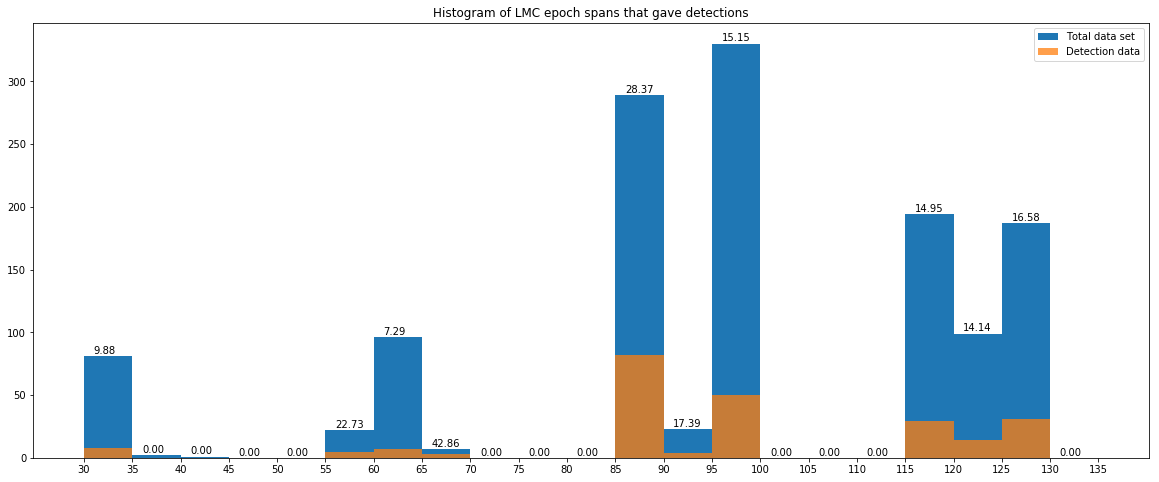

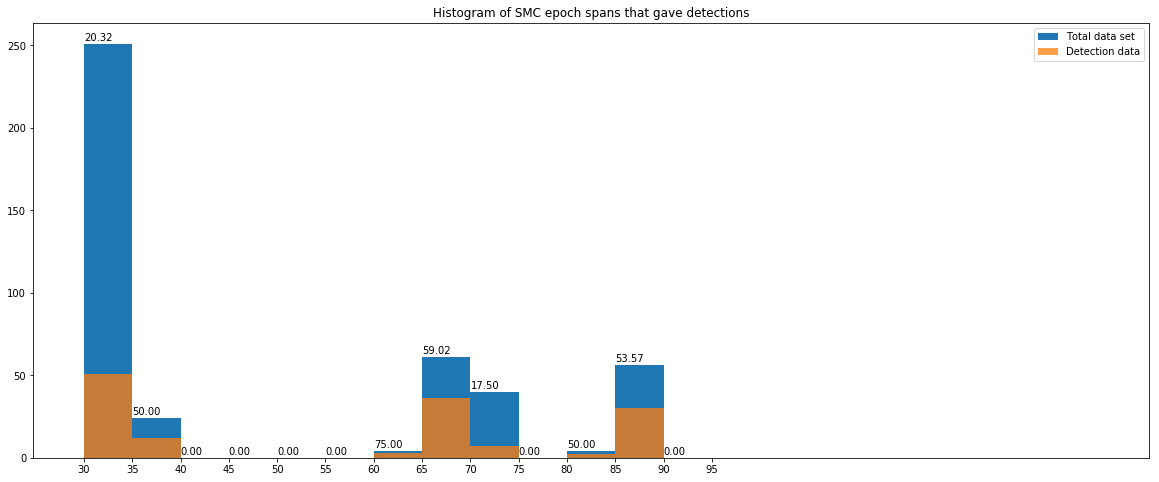

In [63]:
plt.figure(figsize = (20,8))
plt.title('Histogram of LMC epoch spans that gave detections')
x1 = plt.hist(epoch_spanLMC_all, bins = np.arange(30,140,5), label = 'Total data set')
y1 = plt.hist(epoch_spanLMC,bins = np.arange(30,140,5), alpha = 0.75,label = 'Detection data')
plt.xticks(np.arange(30,140,5))
for i in range(len(np.arange(30,140,5))-1):
    percent = "{0:.2f}".format(y1[0][i]/(x1[0][i]+1e-15)*100)
    plt.text(x1[1][i]+1,x1[0][i]+2,percent)
plt.legend()
plt.show()

plt.figure(figsize = (20,8))
plt.title('Histogram of SMC epoch spans that gave detections')
x2 = plt.hist(epoch_spanSMC_all, bins = np.arange(30,100,5), label = 'Total data set')
y2 = plt.hist(epoch_spanSMC,bins = np.arange(30,140,5), alpha = 0.75, label = 'Detection data')
for i in range(len(np.arange(30,100,5))-1):
    percent = "{0:.2f}".format(y2[0][i]/(x2[0][i]+1e-15)*100)
    plt.text(x2[1][i],x2[0][i]+2,percent)
plt.xticks(np.arange(30,100,5))
plt.legend()
plt.show()

Next is a similar plot to the above one but this time we look at the metalicity distribution for the total data set and the detection data. 

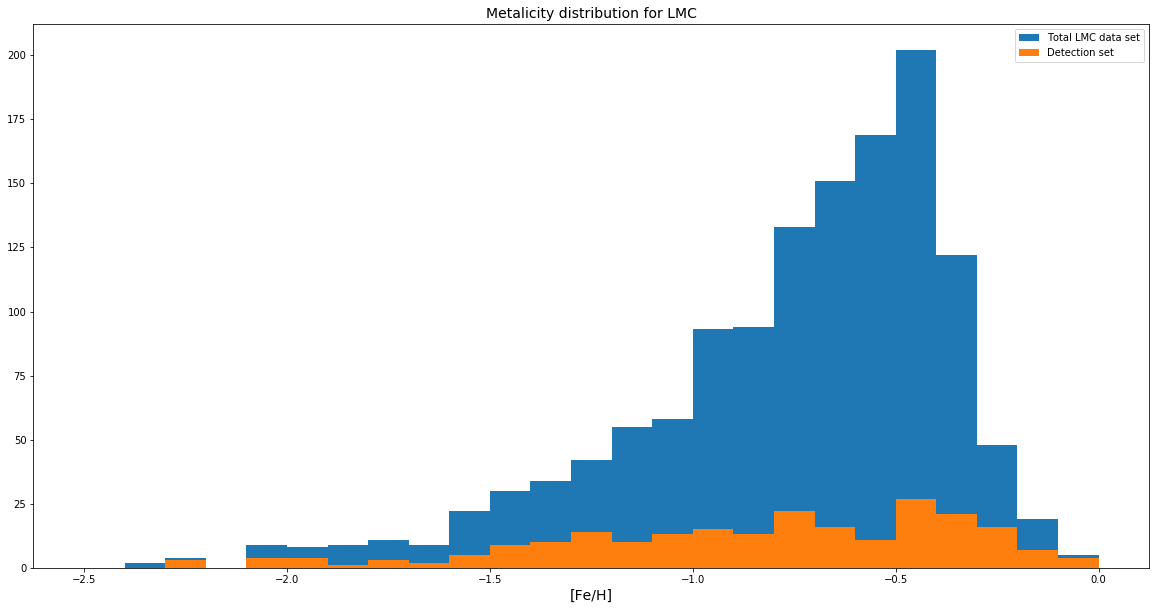

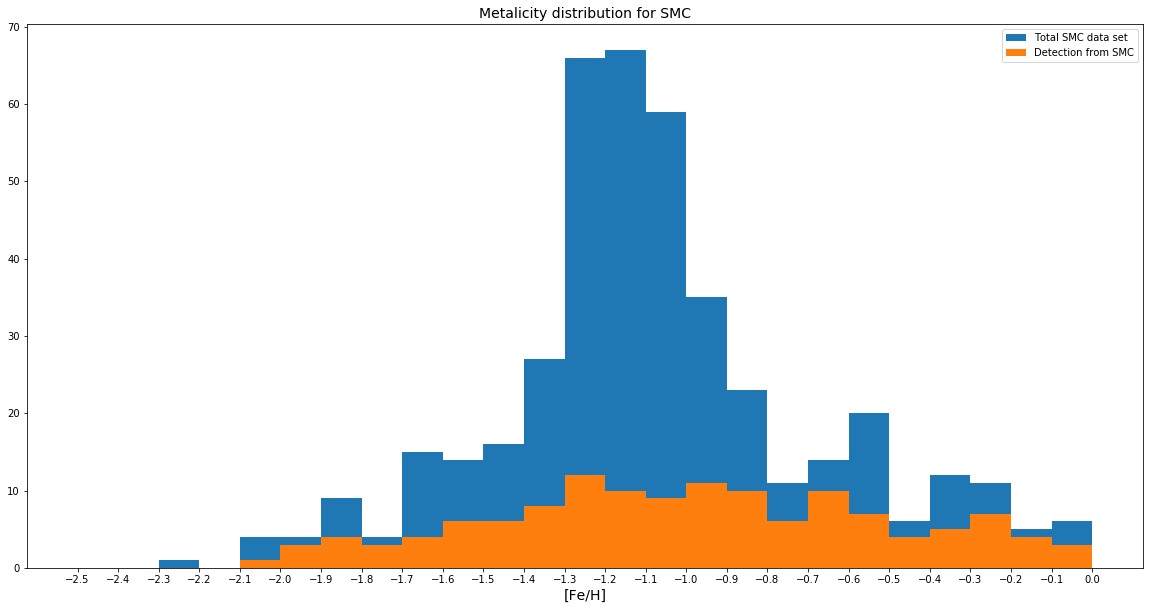

In [35]:
plt.figure(figsize=(20,10))
plt.hist(AllAvg_LMC_5['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Total LMC data set')
plt.hist(AllAvg_LMC_5[binary_bool_LMC_5]['FE_H'],bins = np.arange(-2.5,0.1,0.1), label = 'Detection set')
plt.legend()
plt.title('Metalicity distribution for LMC', size = 14)
plt.xlabel('[Fe/H]', size = 14)
plt.show()

plt.figure(figsize=(20,10))
plt.hist(AllAvg_SMC_5['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Total SMC data set')
plt.hist(AllAvg_SMC_5[binary_bool_SMC_5]['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Detection from SMC')
plt.xticks(np.arange(-2.5,0.1,0.1))
plt.legend()
plt.title('Metalicity distribution for SMC', size = 14)
plt.xlabel('[Fe/H]', size = 14)
plt.show()

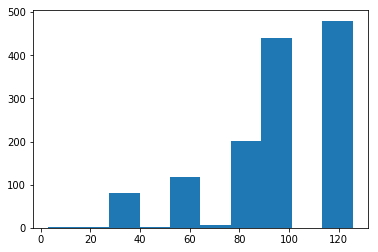

In [32]:
epoch_span = []
for n in range(len(AllAvg_LMC_5)):
    foo = AllAvg_LMC_5['RADIAL_DATE'][n][-1] - AllAvg_LMC_5['RADIAL_DATE'][n][0]
    epoch_span.append(foo)
x = plt.hist(epoch_span)

In [193]:
x[1]

array([ 33.93688 ,  43.112135,  52.28739 ,  61.462645,  70.6379  ,
        79.813155,  88.98841 ,  98.163665, 107.33892 , 116.514175,
       125.68943 ])

In [23]:
robust.mad(AllVis_LMC['SNR']), robust.mad(AllVis_SMC['SNR'])

(16.48624, 14.523513)

In [24]:
min(AllVis_LMC['SNR'])

1.06774

In [25]:
min(AllVis_LMC_SNR['SNR'])

5.00236

In [28]:
    import os
    os.environ['PATH']

'/home/cody/anaconda3/bin:/home/cody/anaconda3/bin:/home/cody/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin'